In [1]:
!pip install keras

In [2]:
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation, Layer, Lambda
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
gt=pd.read_csv('gas_turbines.csv')
gt

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [5]:
gt1=gt.copy()
gt1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [6]:
gt1.shape

(15039, 11)

In [7]:
gt1.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [8]:
gt1.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227
15038,6.9279,1007.2,97.533,3.4275,19.306,1049.9,545.85,111.58,10.583,4.9816,92.498


In [9]:
gt1.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [10]:
gt1.sample(4)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
2155,24.903,1008.40,51.651,4.2608,20.453,1056.7,548.58,109.86,10.632,4.08970,64.691
2374,14.827,1006.80,86.188,5.0624,24.363,1084.1,550.19,132.55,11.800,1.62340,71.838
439,10.416,998.62,100.160,5.1626,23.503,1069.3,543.55,127.83,11.529,11.86400,82.206
677,14.239,1008.50,75.411,5.7568,31.469,1099.8,535.55,154.91,13.481,0.77291,69.863


In [11]:
gt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [12]:
gt1.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [13]:
gt1.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


# VISUALIZATION.

<AxesSubplot:>

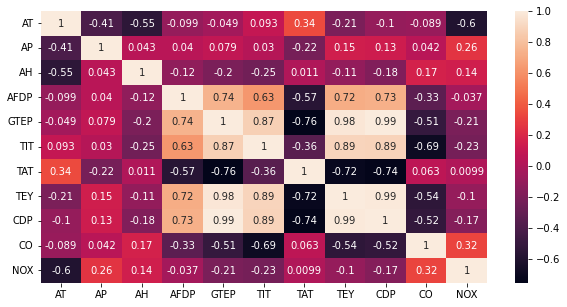

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(gt1.corr(),annot=True)

In [15]:
gta = gt1[gt1.columns[0:10]]
month_colum = gta.select_dtypes(include='object').columns.tolist()

In [16]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=gta,y=col)
    plt.subplot(2,2,i+2)
    gt1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

<Figure size 1152x720 with 0 Axes>

In [17]:
num_columns = gta.select_dtypes(exclude='object').columns.tolist()

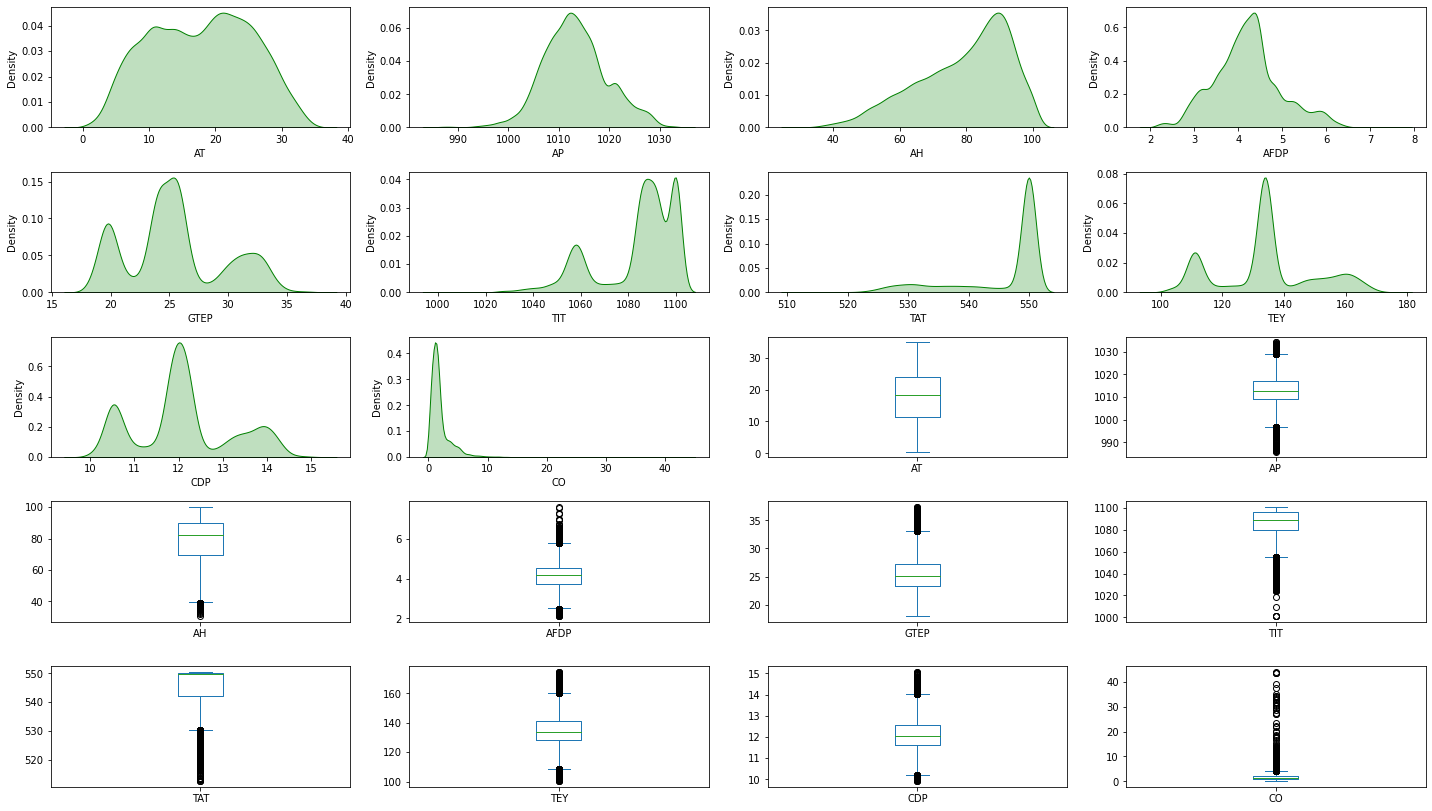

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
skewness,-0.030710,0.107601,-0.681224,0.315150,0.370987,-1.133744,-1.485524,0.145963,0.263042,6.534577
kurtosis,-0.987597,0.424070,-0.282476,0.281642,-0.618358,0.375232,0.847637,-0.487058,-0.589420,82.518116


In [18]:
plt.figure(figsize=(20,18))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(gt[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    gt[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = gt[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [19]:
gt2=gt1.iloc[:,[0,1,2,7]]

In [20]:
gt2

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72
...,...,...,...,...
15034,9.0301,1005.6,98.460,111.61
15035,7.8879,1005.9,99.093,111.78
15036,7.2647,1006.3,99.496,110.19
15037,7.0060,1006.8,99.008,110.74


In [21]:
#Visualizing Ambient Variables.

(array([ 236., 1297., 1877., 2005., 1880., 2190., 2278., 1884., 1088.,
         304.]),
 array([ 0.5223 ,  3.96297,  7.40364, 10.84431, 14.28498, 17.72565,
        21.16632, 24.60699, 28.04766, 31.48833, 34.929  ]),
 <BarContainer object of 10 artists>)

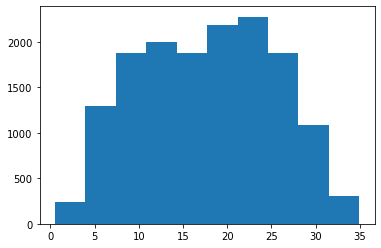

In [22]:
plt.hist(gt2.AT)

(array([  29.,   47.,  206.,  973., 3477., 4783., 3086., 1668.,  697.,
          73.]),
 array([ 985.85 ,  990.685,  995.52 , 1000.355, 1005.19 , 1010.025,
        1014.86 , 1019.695, 1024.53 , 1029.365, 1034.2  ]),
 <BarContainer object of 10 artists>)

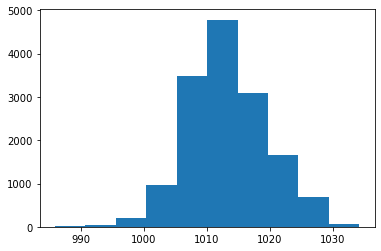

In [23]:
plt.hist(gt2.AP)

(array([  26.,  145.,  425.,  864., 1296., 1660., 2036., 2799., 3716.,
        2072.]),
 array([ 30.344 ,  37.3296,  44.3152,  51.3008,  58.2864,  65.272 ,
         72.2576,  79.2432,  86.2288,  93.2144, 100.2   ]),
 <BarContainer object of 10 artists>)

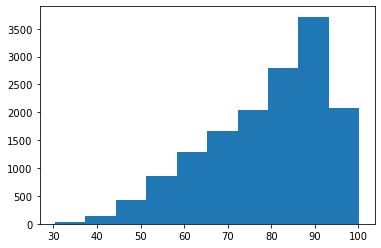

In [24]:
plt.hist(gt2.AH)

In [25]:
x= gt2.iloc[:,0:-1]
x

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [26]:
y=gt2.iloc[:,-1]
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [27]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(x)
X_standardized = a.transform(x)
pd.DataFrame(X_standardized).describe()

,0,1,2
count,1.503900e+04,1.503900e+04,1.503900e+04
mean,-2.320107e-16,-1.925280e-14,1.844983e-16
std,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01
max,2.266234e+00,3.275970e+00,1.528011e+00


In [28]:
model = Sequential()
model.add(Dense(12, input_dim=3,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(8,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history= model.fit(x, y,validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
1008/1008 [==============================] - 4s 3ms/step - loss: -7966866.5000 - accuracy: 0.0000e+00 - val_loss: -30939310.0000 - val_accuracy: 0.0000e+00
Epoch 2/150
1008/1008 [==============================] - 3s 3ms/step - loss: -107280768.0000 - accuracy: 0.0000e+00 - val_loss: -210663696.0000 - val_accuracy: 0.0000e+00
Epoch 3/150
1008/1008 [==============================] - 3s 3ms/step - loss: -397300576.0000 - accuracy: 0.0000e+00 - val_loss: -604029056.0000 - val_accuracy: 0.0000e+00
Epoch 4/150
1008/1008 [==============================] - 3s 3ms/step - loss: -924322560.0000 - accuracy: 0.0000e+00 - val_loss: -1243982208.0000 - val_accuracy: 0.0000e+00
Epoch 5/150
1008/1008 [==============================] - 3s 3ms/step - loss: -1717210752.0000 - accuracy: 0.0000e+00 - val_loss: -2155981824.0000 - val_accuracy: 0.0000e+00
Epoch 6/150
1008/1008 [==============================] - 3s 3ms/step - loss: -2802103040.0000 - accuracy: 0.0000e+00 - val_loss: -3365991680.0000

In [29]:
_, accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

470/470 [==============================] - 1s 2ms/step - loss: -16976278716416.0000 - accuracy: 0.0000e+00
Accuracy: 0.00


In [30]:
# the value of cost function for cross-validation data and the value of cost function for your training data has decreased.

In [31]:
# Adding an additional hidden layer to the model.

In [32]:
model2=Sequential()
model2.add(Dense(10, activation='relu'))
model2.add(Dense(5, activation='relu'))
model2.add(Dense(3, activation='relu'))
model2.add(Dense(1, activation='linear'))
model2.compile(loss='mean_squared_error', optimizer='adam')
history=model2.fit(x, y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
1008/1008 [==============================] - 3s 3ms/step - loss: 22877.9414 - val_loss: 17420.8398
Epoch 2/150
1008/1008 [==============================] - 3s 3ms/step - loss: 18203.3945 - val_loss: 17168.3398
Epoch 3/150
1008/1008 [==============================] - 3s 3ms/step - loss: 17941.4492 - val_loss: 16911.6211
Epoch 4/150
1008/1008 [==============================] - 3s 3ms/step - loss: 17678.2109 - val_loss: 16655.3496
Epoch 5/150
1008/1008 [==============================] - 3s 3ms/step - loss: 17415.8438 - val_loss: 16400.3887
Epoch 6/150
1008/1008 [==============================] - 3s 3ms/step - loss: 17154.9453 - val_loss: 16147.0518
Epoch 7/150
1008/1008 [==============================] - 3s 3ms/step - loss: 16896.0957 - val_loss: 15895.9424
Epoch 8/150
1008/1008 [==============================] - 3s 3ms/step - loss: 16639.2305 - val_loss: 15646.7236
Epoch 9/150
1008/1008 [==============================] - 3s 3ms/step - loss: 16384.3926 - val_loss: 15399.6289
E

In [33]:
model2.evaluate(x,y)

470/470 [==============================] - 1s 2ms/step - loss: 251.1828


251.18276977539062

In [40]:
# importing the tensorflow module
import tensorflow as tf

# importing the training and testing dataset
(x_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


# Normalize pixels to values between 0 and 1
x_train = x_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

4422102/4422102 [==============================] - 2s 0us/step


In [41]:
# Building  model
model = tf.keras.Sequential()

# flattening the layer
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

# defining hidden layer with 200 nodes
model.add(tf.keras.layers.Dense(units=200, activation='relu', name='dense_1'))

# adding a drop out in the hidden layer
model.add(tf.keras.layers.Dropout(0.2))

# adding output laers
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [43]:
# compiling the model with learning rate is 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              
#               loss function is categorical cross entropy
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [44]:
#  Early stopping set after 4 epochs
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

# Training the model using 10 epochs
model.fit(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early], verbose=2)

Epoch 1/10
1500/1500 - 5s - loss: 0.5351 - accuracy: 0.8095 - val_loss: 0.4247 - val_accuracy: 0.8480 - 5s/epoch - 3ms/step
Epoch 2/10
1500/1500 - 5s - loss: 0.3994 - accuracy: 0.8553 - val_loss: 0.3704 - val_accuracy: 0.8651 - 5s/epoch - 3ms/step
Epoch 3/10
1500/1500 - 5s - loss: 0.3633 - accuracy: 0.8677 - val_loss: 0.3491 - val_accuracy: 0.8748 - 5s/epoch - 3ms/step
Epoch 4/10
1500/1500 - 5s - loss: 0.3422 - accuracy: 0.8744 - val_loss: 0.3300 - val_accuracy: 0.8788 - 5s/epoch - 3ms/step
Epoch 5/10
1500/1500 - 5s - loss: 0.3247 - accuracy: 0.8788 - val_loss: 0.3275 - val_accuracy: 0.8790 - 5s/epoch - 3ms/step
Epoch 6/10
1500/1500 - 5s - loss: 0.3107 - accuracy: 0.8852 - val_loss: 0.3366 - val_accuracy: 0.8789 - 5s/epoch - 3ms/step
Epoch 7/10
1500/1500 - 5s - loss: 0.2989 - accuracy: 0.8885 - val_loss: 0.3250 - val_accuracy: 0.8808 - 5s/epoch - 3ms/step
Epoch 8/10
1500/1500 - 5s - loss: 0.2910 - accuracy: 0.8921 - val_loss: 0.3246 - val_accuracy: 0.8824 - 5s/epoch - 3ms/step
Epoch 9/

In [45]:
# importing the pandas module
import pandas as pd

# defining the function
def evaluate_model(model, X_test, y_test):

    # Evauting the model using teh testing dataset
    eval_dict = model.evaluate(X_test, y_test, return_dict=True)
    
    # converting the evaluation ( accuracy and loss) to pandas dataframe
    result = pd.DataFrame([eval_dict.values()], columns=[list(eval_dict.keys())])
    
    # returining dataframe
    return result

In [46]:
# calling the funtion
results = evaluate_model(model, X_test, y_test)

# Display results
results.head()

313/313 [==============================] - 1s 2ms/step - loss: 0.3581 - accuracy: 0.8706


,loss,accuracy
0,0.358144,0.8706
